Notebook on Statistics for Big Data by João Pedro Apolonio. Here we will focus on:

- Statistical Significance in a Big Data context
- Effect Size: Actually important or just significant?
- Multiple Testing

Based on exercises by Julien Gagneur

In [ ]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
from google.colab import drive
drive.mount('/content/drive')

#Genotype indicates if the genome of the yeast is artificial(lab strain) or wild(seen in nature).
genotype = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/eqtl/genotype.txt", sep='\t')
genotype = pd.melt(genotype, id_vars = "strain", var_name = "marker", value_name = "genotype")

#Growth observed in the experiments for each strain in the study in different media.
growth = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/eqtl/growth.txt", sep='\t')
growth = pd.melt(growth, id_vars = "strain", var_name = "media",value_name = "growth_rate")

#Marker shows the positions of the genes that may be responsible for the growth observed.
marker = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/eqtl/marker.txt", sep='\t')
# Rename column 'id' to 'marker' in 'marker' DataFrame
marker.rename(columns={"id": "marker"}, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. We will use a standard normal (µ = 0 and σ² = 1) distribution as a reference set. Please simulate 100 draws from a standard normal distribution. Plot a histogram of these values. Next, use create a QQ-plot comparing the expected against the observed quantiles.

Text(0.5, 0, 'Observations')

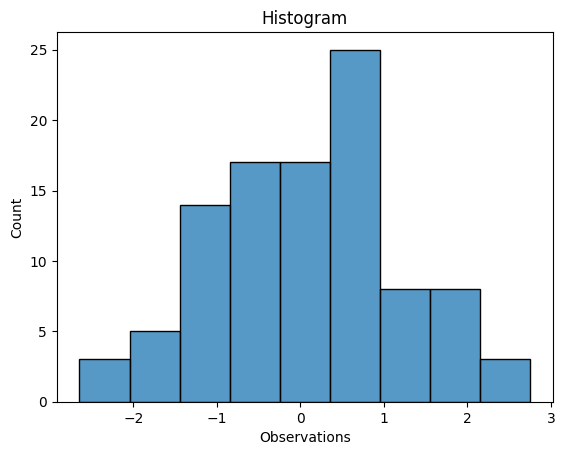

In [ ]:
normal=stats.norm(0,1)
dt = normal.rvs(100)

sns.histplot(dt)
plt.title('Histogram')
plt.xlabel('Observations')

[]

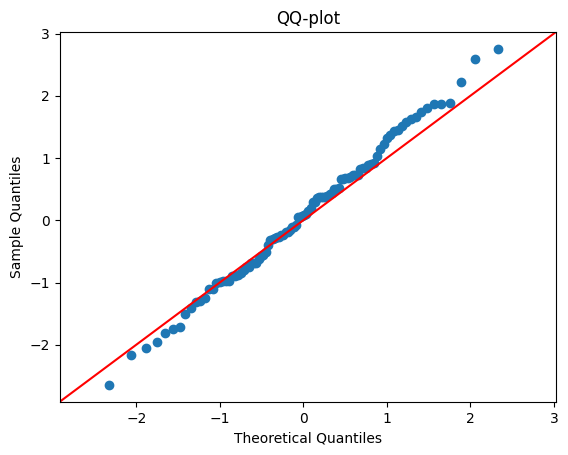

In [ ]:
sm.qqplot(dt,line='45')
plt.title('QQ-plot')
plt.plot()

2. Now add a normal distribution with µ = 4 to your data.table and plot the Q-Q plot. How did it change?


[]

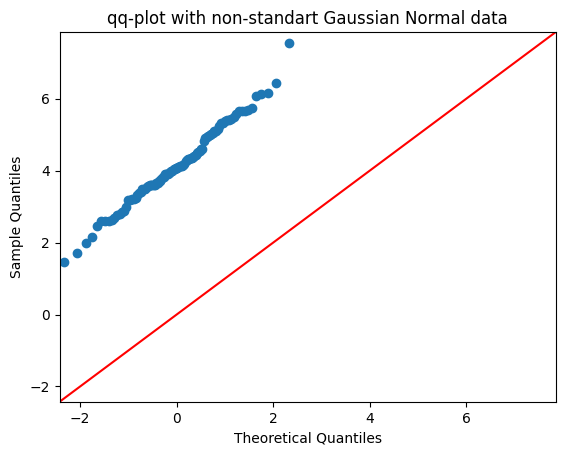

In [ ]:
dt2=np.random.normal(4,1,100)
sm.qqplot(dt2,line='45')
plt.title('qq-plot with non-standart Gaussian Normal data')
plt.plot()

Consider the dataset mtcars. Find all pairs of quantitative variables that show significant association (at
the 5% level) with each other. Do not make any assumptions of distribution.

In [ ]:
cars=pd.DataFrame(sns.load_dataset('mpg'))
n=cars.shape[0]
numeric_cars=cars.drop(columns=['name','origin'])
already_considered_var=[]
numeric_cars=numeric_cars.dropna()
corrs={}
for variable1 in numeric_cars.columns:
  for variable2 in numeric_cars.columns:
    already_considered_var.append(variable1)
    if variable2 not in already_considered_var:
      if variable1!=variable2:
        cor,pval = stats.spearmanr(numeric_cars[f'{variable1}'],numeric_cars[f'{variable2}'])# We do not want to assume any distributions.
        if pval<0.05:
          corrs[f'{variable1},{variable2}'] =pval

corr_df=pd.DataFrame.from_dict(corrs, orient='index', columns=['P-values'])
corr_df.head()

,P-values
"mpg,cylinders",6.649861e-98
"mpg,displacement",2.195778e-113
"mpg,horsepower",1.619383e-112
"mpg,weight",2.662378e-125
"mpg,acceleration",3.903604e-20


2. Now ensure that, on average, less than 5% of the significant associations you find are false positives.


In [ ]:
_,p_adjusted,_,_=multipletests(corr_df['P-values'], alpha=0.05, method='fdr_bh')
corr_df['bh_pvals']=p_adjusted
corr_df

[1.55163427e-097 6.58733280e-113 4.25088102e-112 9.31832278e-125
 5.46504499e-020 1.30646804e-035 1.90140180e-153 1.27372838e-094
 6.34121203e-125 2.06238082e-023 2.05054619e-011 5.91536848e-125
 5.17265725e-191 6.56041557e-026 6.21793215e-010 1.52787148e-126
 9.84678616e-050 1.47116050e-015 8.51057334e-017 1.59136469e-008
 2.09849542e-008]


In [ ]:
_,bonferroni_pvals,_,_=multipletests(corr_df['P-values'], alpha=0.05, method='bonferroni')
corr_df['bonferroni_pvals']=bonferroni_pvals
corr_df

,P-values,adjusted_pvals,bh_pvals,bonferroni_pvals
"mpg,cylinders",6.649861e-98,1.551634e-97,1.551634e-97,1.396471e-96
"mpg,displacement",2.195778e-113,6.587333e-113,6.587333e-113,4.611133e-112
"mpg,horsepower",1.619383e-112,4.250881e-112,4.250881e-112,3.400705e-111
"mpg,weight",2.662378e-125,9.318323e-125,9.318323e-125,5.590994e-124
"mpg,acceleration",3.903604e-20,5.465045e-20,5.465045e-20,8.197567e-19
"mpg,model_year",7.465532e-36,1.306468e-35,1.306468e-35,1.567762e-34
"cylinders,displacement",1.810859e-154,1.901402e-153,1.901402e-153,3.802804e-153
"cylinders,horsepower",6.065373e-95,1.273728e-94,1.273728e-94,1.273728e-93
"cylinders,weight",1.509812e-125,6.341212e-125,6.341212e-125,3.170606e-124
"cylinders,acceleration",1.374921e-23,2.062381e-23,2.062381e-23,2.887333e-22
